In [1]:
import os
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import spacy
import string
import gensim
import numpy as np

In [2]:
df = pd.read_json('../../data/translated/sarcasm/sarcasm_headlines_dataset_pl.json')

In [3]:
df = df.drop(columns=['article_link', 'headline'])
df

,is_sarcastic,headline_pl
0,1,Naukowcy z lat trzydziestych odkrywają zegar z...
1,0,"Reprezentantka rządu USA wyjaśnia, dlaczego Ko..."
2,0,Jedz warzywa: 9 pysznie różnych przepisów
3,1,Nieprzyjemna pogoda uniemożliwia kłamcy dotarc...
4,1,"matka jest bardzo blisko użycia słowa ""streami..."
...,...,...
28614,1,Żydzi świętują Rosh Hashasha czy coś
28615,1,Śledczy spraw wewnętrznych rozczarowany spiski...
28616,0,Najpiękniejsza przemowa akceptacyjna w tym tyg...
28617,1,Mars zniszczony przez pałac kosmiczny na orbic...


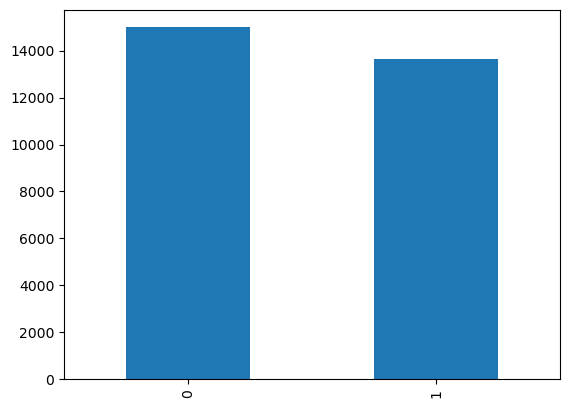

In [4]:
data = df["is_sarcastic"]
data.value_counts().plot.bar()
plt.show()

In [5]:
spacy_model = spacy.load("pl_core_news_sm")

In [6]:
# Stop words
stop_words = spacy_model.Defaults.stop_words.copy()
stop_words.remove("nie")
print(stop_words)

{'oni', 'jesli', 'im', 'ta', 'jak', 'jemu', 'mają', 'żadnych', 'az', 'tys', 'kilku', 'będzie', 'ponad', 'ten', 'bardziej', 'przede', 'sobą', 'ma', 'nawet', 'niemu', 'kims', 'takich', 'dużo', 'toteż', 'znowu', 'rowniez', 'znów', 'wszystkich', 'coraz', 'ix', 'jakos', 'obok', 'inne', 'jakoś', 'jako', 'jednakze', 'każdy', 'którzy', 'wam', 'mu', 'nami', 'żadna', 'można', 'jeśli', 'teraz', 'dzis', 'wasi', 'gdyz', 'lub', 'według', 'go', 'ktos', 'nam', 'są', 'lecz', 'ku', 'zeby', 'pan', 'nia', 'u', 'jednak', 'was', 'mam', 'który', 'około', 'poniewaz', 'mało', 'sobie', 'mnie', 'bardzo', 'będą', 'totobą', 'ach', 'ktorej', 'juz', 'ono', 'bylo', 'bym', 'często', 'ponieważ', 'wasz', 'cię', 'gdyby', 'xv', 'powinna', 'moim', 'wlasnie', 'moje', 'gdzie', 'właśnie', 'jakkolwiek', 'aj', 'sposób', 'z', 'czyli', 'naszych', 'soba', 'a', 'przez', 'twoi', 'alez', 'jakichs', 'kto', 'by', 'powinni', 'niż', 'wami', 'swoje', 'jedno', 'czy', 'bowiem', 'iz', 'jakichś', 'jakie', 'ciebie', 'zadne', 'powinno', 'gdyż',

In [7]:
# Punctuation
punctuations = string.punctuation
print(punctuations)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [8]:
# Tokenizer
def spacy_tokenizer(sentence):
    doc = spacy_model(sentence)

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() for word in doc ]

    # Removing stop words and punctuation
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

In [9]:
texts = df['headline_pl'].to_list()
tokenized_sentences = [spacy_tokenizer(text) for text in texts]

In [10]:
# Word2Vec
w2v_model = gensim.models.Word2Vec(sentences=tokenized_sentences, vector_size=100, window=6, min_count=1)
type(w2v_model)

gensim.models.word2vec.Word2Vec

In [11]:
tokenized_sentences

[['naukowiec',
  'rok',
  'trzydziesty',
  'odkrywać',
  'zegar',
  'zagłada',
  'wypadać',
  'włos'],
 ['reprezentantek',
  'rząd',
  'usa',
  'wyjaśniać',
  'kongres',
  'brakować',
  'równość',
  'płeć',
  'rasa'],
 ['jedz', 'warzywać', '9', 'pysznie', 'różny', 'przepis'],
 ['nieprzyjemny', 'pogoda', 'uniemożliwiać', 'kłamca', 'dotarcie', 'praca'],
 ['matka', 'blisko', 'użyć', 'słowo', 'streaming', 'poprawnie'],
 ['biały', 'dziedzictwo'],
 ['5', 'złożyć', 'podatek', 'mały', 'stres'],
 ['darowizny',
  'richarda',
  'brandona',
  'ocieplenie',
  'świat',
  'tyle',
  'samo',
  'koszt',
  'nieudany',
  'lot',
  'balon'],
 ['rząd',
  'cień',
  'zbyt',
  'duży',
  'spotkać',
  'sala',
  'konferencyjny',
  'marriott'],
 ['rodzic', 'znać', 'scenariusz'],
 ['lesbijka', 'uważać', 'ojciec', 'indie', 'niesamowitać'],
 ['amanda', 'peet', 'swój', 'córka', 'seks', 'wyjątkowy', 'uścisko'],
 ['należeć', 'wiedzieć', 'obecny', 'metoda', 'leczyć', 'ebola'],
 ['chris',
  'christie',
  'sugerować',
  'hi

In [12]:
w2v_model.train(tokenized_sentences, epochs=10, total_examples=len(tokenized_sentences))

(2011717, 2077060)

In [13]:
print("The no of words :", len(w2v_model.wv))

The no of words : 32485


In [14]:
def tokens_to_vector(sentence):
    vector_size = w2v_model.vector_size
    wv_res = np.zeros(vector_size)
    ctr = 1
    for w in sentence:
        if w in w2v_model.wv:
            ctr += 1
            wv_res += w2v_model.wv[w]
    wv_res = wv_res/ctr
    return wv_res

In [15]:
tokenized_sentences[0]

['naukowiec',
 'rok',
 'trzydziesty',
 'odkrywać',
 'zegar',
 'zagłada',
 'wypadać',
 'włos']

In [16]:
vectors = [tokens_to_vector(tokenized_sentence) for tokenized_sentence in tokenized_sentences]
vectors

[array([-2.33725461e-01,  2.93055558e-01,  1.00360196e-02,  3.09786972e-01,
        -2.78259654e-01, -5.41704794e-01,  1.69980760e-01,  7.02850117e-01,
        -4.75622552e-01, -6.84718400e-02, -4.99178491e-01, -7.73326182e-01,
         3.38693444e-02, -3.21926337e-02, -1.35666614e-02, -1.80911808e-01,
         1.71065453e-02, -5.45342305e-01, -1.32129326e-01, -6.55222330e-01,
         2.97308681e-01,  3.89326475e-01,  4.74911395e-01, -1.48847427e-01,
         1.56113376e-01,  8.63944846e-02, -5.70966443e-01,  1.02840957e-01,
        -2.96184265e-01,  7.54607684e-02,  3.90538924e-01,  2.01890825e-03,
         3.11672784e-01, -2.41050430e-01, -5.83752222e-02,  3.10852496e-01,
         1.24976495e-01, -1.50645672e-01,  8.75370784e-06, -6.04411062e-01,
        -1.93306974e-01, -2.53399693e-01, -1.92524877e-01,  1.75819883e-02,
         3.28397604e-02,  2.79561969e-01, -3.48254342e-01, -5.43703609e-02,
         9.45757333e-02,  2.17975373e-01,  4.78739726e-01, -2.70595562e-01,
        -3.8

In [18]:
X = np.array(vectors)
y = df['is_sarcastic'].to_numpy()

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, random_state=42)

In [20]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='sigmoid'))

In [21]:
model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"])

In [22]:
model.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

Epoch 1/10
716/716 [==============================] - 2s 2ms/step - loss: 0.6413 - accuracy: 0.6236 - val_loss: 0.6259 - val_accuracy: 0.6401
Epoch 2/10
716/716 [==============================] - 1s 2ms/step - loss: 0.6221 - accuracy: 0.6497 - val_loss: 0.6202 - val_accuracy: 0.6501
Epoch 3/10
716/716 [==============================] - 1s 2ms/step - loss: 0.6170 - accuracy: 0.6543 - val_loss: 0.6107 - val_accuracy: 0.6639
Epoch 4/10
716/716 [==============================] - 1s 2ms/step - loss: 0.6120 - accuracy: 0.6597 - val_loss: 0.6068 - val_accuracy: 0.6578
Epoch 5/10
716/716 [==============================] - 1s 2ms/step - loss: 0.6088 - accuracy: 0.6634 - val_loss: 0.6051 - val_accuracy: 0.6592
Epoch 6/10
716/716 [==============================] - 1s 2ms/step - loss: 0.6055 - accuracy: 0.6662 - val_loss: 0.6016 - val_accuracy: 0.6685
Epoch 7/10
716/716 [==============================] - 1s 2ms/step - loss: 0.6032 - accuracy: 0.6667 - val_loss: 0.6000 - val_accuracy: 0.6723
Epoch 

In [23]:
import sklearn.metrics as skmetrics
import os
import matplotlib.pyplot as plt

def _create_dirs_if_not_exists(directory):
    if not os.path.isdir(directory):
        os.makedirs(directory)

def plot_and_save_conf_matrix(class_actual, class_preds, figure_dir_path, figure_filename):
    confusion_matrix = skmetrics.confusion_matrix(class_actual, class_preds)
    disp = skmetrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
    disp.plot()

    figure_dir = os.path.join(os.curdir, figure_dir_path)
    _create_dirs_if_not_exists(figure_dir)

    plt.savefig(os.path.join(figure_dir, figure_filename))
    plt.show()

def get_class_preds(model, test_dataset, return_classes=True):
    prediction_logits = model.predict(test_dataset)
    probabilities = tf.nn.softmax(prediction_logits)
    if return_classes:
        return np.argmax(probabilities, axis=1)
    else:
        return probabilities.numpy()

45/45 [==============================] - 0s 1ms/step


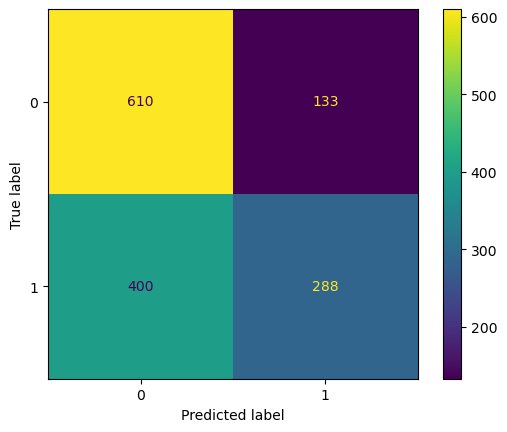

In [24]:
class_preds = get_class_preds(model, X_test)
model_name = 'sarcasm_pl_word2vec_external'
training_name = model_name
figures_dir = f"../../documentation/models/{model_name}/figures"

plot_and_save_conf_matrix(class_actual=y_test,
                                      class_preds=class_preds,
                                      figure_dir_path=figures_dir,
                                      figure_filename=f"{training_name}_confmatrix.png")